In [102]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import jn

In [2]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

def FiguraOptica2(U0,X,Y,lamb,z):
  ZX,ZY,ZD=[],[],[]

  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    ZX.append(abs( U[len(U0)//2])**2 )
    ZY.append(abs(np.transpose(U)[len(U)//2])**2)

    
  return ZX,ZY,ZD

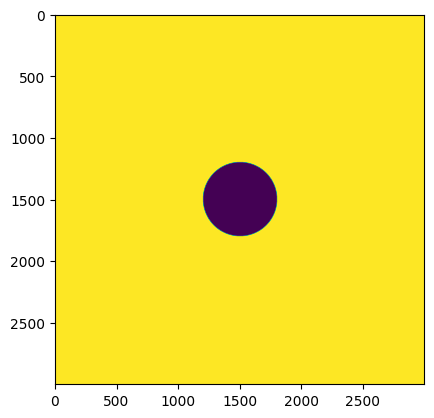

In [142]:
N = 3000
lamb = 0.632*10**(-3)

R = 1

x = np.linspace(-5*R,5*R,N,endpoint=False)
y = x#np.linspace(-2*ly-d,2*ly+d,N,endpoint=False)
X,Y = np.meshgrid(x,y)

A = (X**2+Y**2>R**2)

plt.imshow(A)

([], [])

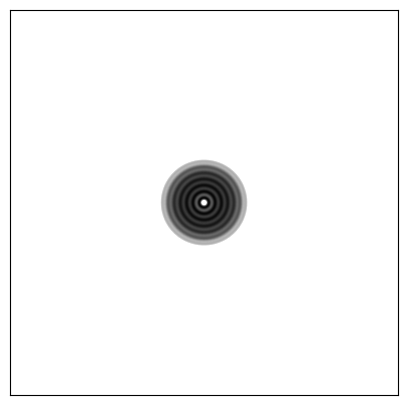

In [157]:
z0 = 520.1

U = Optica(A,X,Y,z0,lamb)
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(1,1 ,wspace=0.4,hspace=0.4)  # Adjust `wspace` to control space between columns

ax0 = fig.add_subplot(gs[0])

vmax = 0.5
img = ax0.imshow(abs(U)**2,cmap='gray',aspect='auto',vmin = 0,vmax=vmax)
#cbar = plt.colorbar(img)
#cbar.set_label('Intensidade')
plt.yticks([])
plt.xticks([])

#plt.savefig('placa.svg',dpi=300)

In [144]:
z = np.linspace(0.01,z0,300)

ZX,ZY,ZD = FiguraOptica2(A,X,Y,lamb,z)

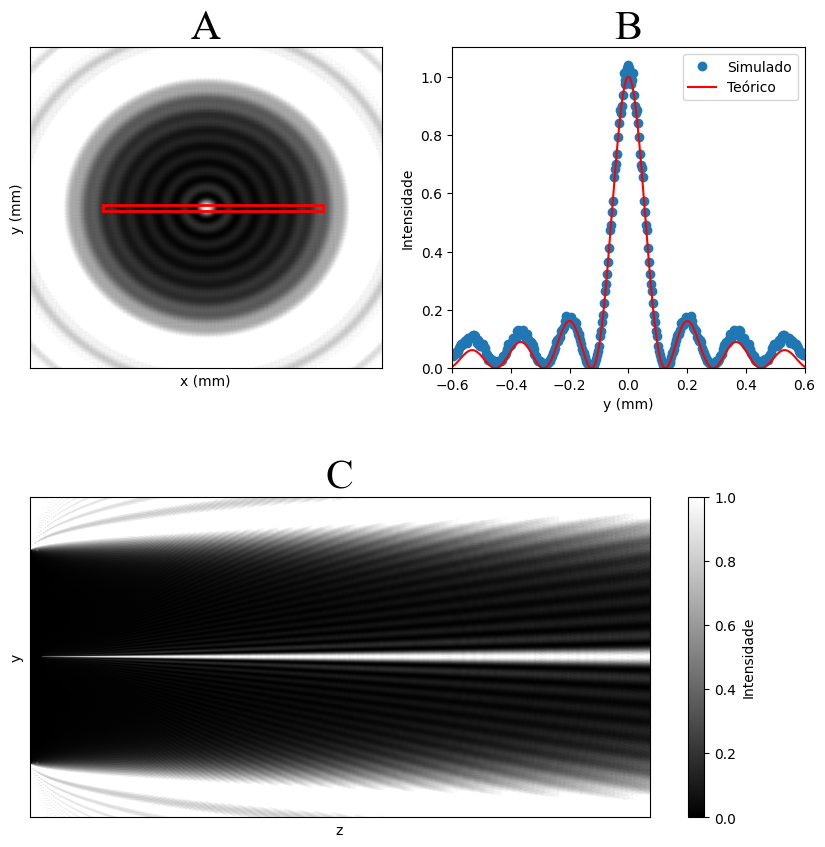

In [222]:
# Assuming U, y, z0, lamb, ly, d, and ZY are defined elsewhere in your code

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.4)  # Same height for both rows

# First subplot
ax0 = fig.add_subplot(gs[0, 0])
condition = (abs(X) < 1.2 * R) & (abs(Y) < 1.2 * R)

img = ax0.imshow(abs( np.transpose(U[np.where(abs(x)<1.6*R)[0]] ) [ np.where(abs(x)<1.6*R)[0] ] )**2,cmap='gray',aspect='auto',vmin = 0,vmax=1)

#cbar = plt.colorbar(img)
#cbar.set_label('Intensidade')
ax0.set_yticks([])
ax0.set_xticks([])
ax0.set_ylabel('y (mm)')
ax0.set_xlabel('x (mm)')

# Adding a rectangle to indicate the zoomed area
zoom_rect = plt.Rectangle((N//15, N//6.37), N//5, N//150, linewidth=2, edgecolor='red', facecolor='none')
ax0.add_patch(zoom_rect)
ax0.set_title('A',fontname = 'Times New Roman',fontsize=30)

# Second
ax0 = fig.add_subplot(gs[0, 1])
ax0.plot(y, abs(np.transpose(U)[N // 2]) ** 2, 'o', label='Simulado')

r = 2*R*np.pi/(lamb*z0)*y
J = (z0**2)*(jn(0,r))**2 /(z0**2+R**2)

ax0.plot(y,J,'-',color='red',label=f'Teórico')

ax0.legend()
ax0.set_ylim(0,1.1)
ax0.set_xlim(-R*0.6,R*0.6)
ax0.set_ylabel('Intensidade')
ax0.set_xlabel('y (mm)')
ax0.set_title('B',fontname = 'Times New Roman',fontsize=30)


# Second subplot
vmin, vmax = 0, 1
ax1 = fig.add_subplot(gs[1, :])
img = ax1.imshow(np.transpose(ZY)[np.where(abs(x)<1.5*R)[0]], cmap='gray', aspect='auto', extent=[0, z[-1], -ly - d / 2, ly + d / 2], vmin=vmin, vmax=vmax)

ax1.set_ylabel('y')
ax1.set_yticks([])
ax1.set_xlabel('z')
ax1.set_xticks([])
ax1.set_title('C',fontname = 'Times New Roman',fontsize=30)

cbar = plt.colorbar(img, ax=ax1, location='right')
cbar.set_label('Intensidade')

# Remove the lines around the colorbar
#for spine in ax1.spines.values():
#    spine.set_visible(False)

#ax1.set_yticks([])
#ax1.set_xticks([])

# Uncomment to save the figure
plt.savefig('Fig2.svg', dpi=300)

plt.show()
